# Pymaceuticals Inc.
---

### Analysis

* Capomulin and Ramicane seem to be two drug regimens that work best to reduce tumor volume. Whereas Infubinol and Ceftamin are the least impactful drug regimens
* Effect of different drug regimens, on Male and female mouses, are almost similar
* With Capomulin treatment, tumor volume seems to first increase but after around 20th day, it starts to decrease hugely
* Mouse weight vs average tumor volume looks correlated. When weight is higher, tumor volume seems higher, too. 
 

In [191]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [192]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [193]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_entries = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice = combined_data[duplicated_entries]['Mouse ID'].unique()
duplicate_mice 

array(['g989'], dtype=object)

In [194]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = combined_data[duplicated_entries]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [195]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != duplicate_mice[0]]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [196]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

In [197]:
clean_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
clean_data_group = clean_data.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_data_mean = clean_data_group['Tumor Volume (mm3)'].mean()
clean_data_median = clean_data_group['Tumor Volume (mm3)'].median()
clean_data_variance = clean_data_group['Tumor Volume (mm3)'].var()
clean_data_stddev = clean_data_group['Tumor Volume (mm3)'].std()
clean_data_sem = clean_data_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": clean_data_mean,
                           "Median Tumor Volume": clean_data_median,
                           "Tumor Volume Variance": clean_data_variance,
                           "Tumor Volume Std. Dev.": clean_data_stddev,
                           "Tumor Volume Std. Err.": clean_data_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [199]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_stats.columns])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

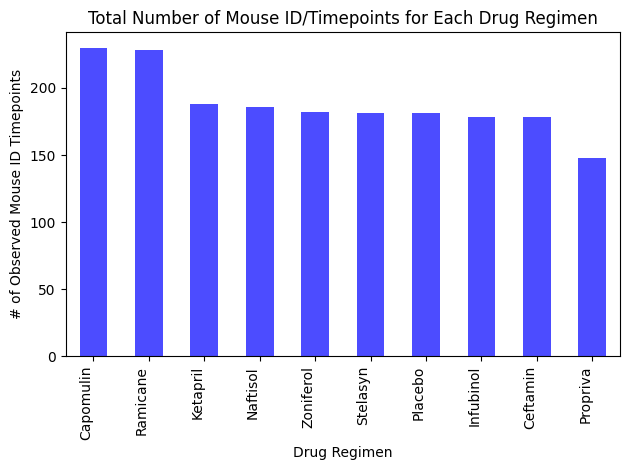

In [200]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and count rows
drug_counts = clean_data['Drug Regimen'].value_counts()
# Create a bar plot
drug_counts.plot(kind='bar', color='blue', alpha=0.7)
# Customize the plot
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse ID Timepoints')
plt.xticks(rotation='vertical', ha='right')
plt.tight_layout()

# Show plot
plt.show()

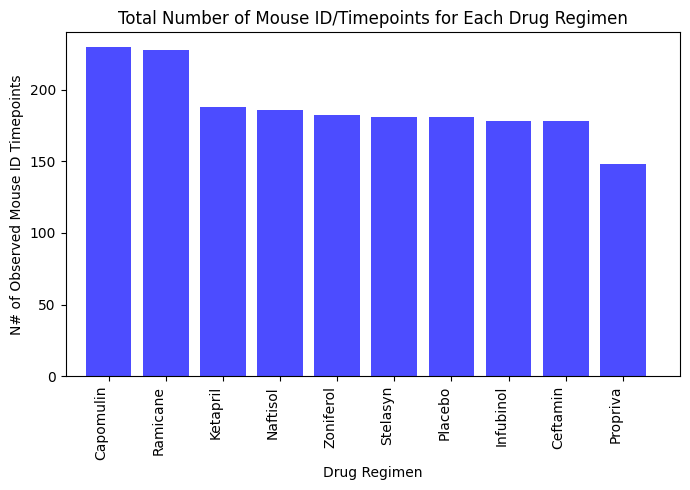

In [201]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(7, 5))  # Adjust the figure size if needed
plt.bar(drug_counts.index, drug_counts.values, color='blue', alpha=0.7)

# Customize the plot
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('N# of Observed Mouse ID Timepoints')
plt.xticks(rotation='vertical', ha='right')
plt.xlim(-0.75, len(drug_counts))
plt.ylim(0, max(drug_counts.values)+10)
plt.tight_layout()

# Show plot
plt.show()

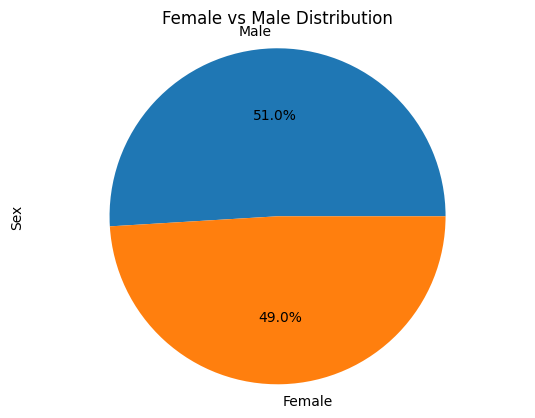

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_data['Sex'].value_counts()
sex_counts.plot(kind='pie', labels=sex_counts.index, autopct="%1.1f%%", ylabel = 'Sex')
plt.title('Female vs Male Distribution')
plt.axis("equal")
plt.show()

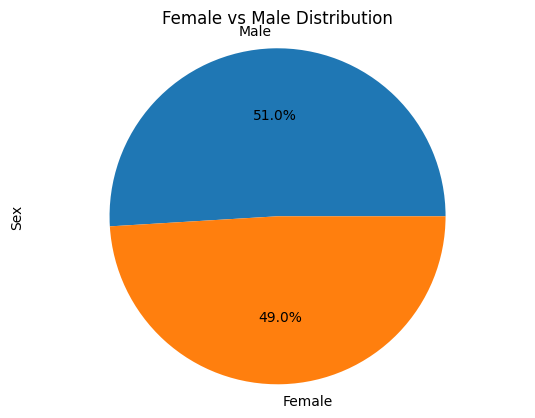

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts.values, labels=sex_counts.index, autopct="%1.1f%%")
plt.title('Female vs Male Distribution')
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [205]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Subset data for the current treatment regimen
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]
    
    # Get tumor volume data for current treatment regimen
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)
    # Calculate quartiles, IQR, and bounds for potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outlier bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine potential outliers
    outliers = treatment_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print results
    print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)']}")
#print(treatment_data)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


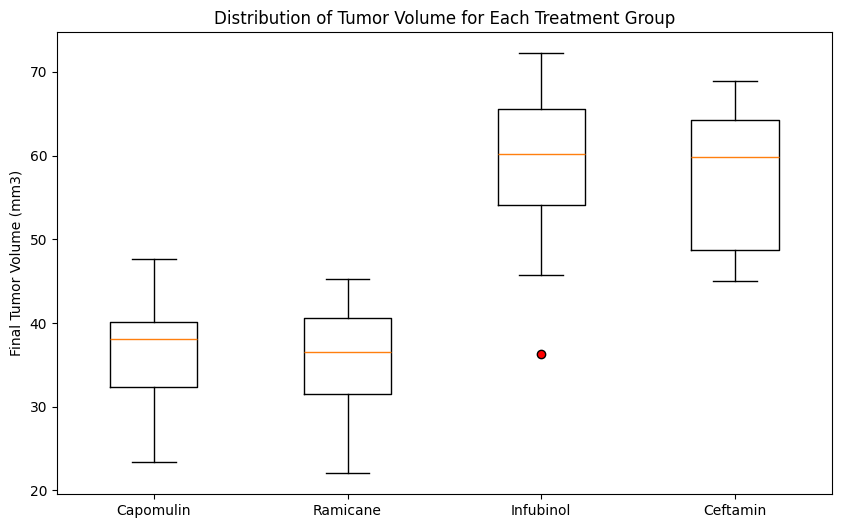

In [206]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(tumor_volume_data, tick_labels=treatments)

# Change color of outliers to red
for outliers in boxplot['fliers']:
    outliers.set(marker='o', markerfacecolor='red')  # Customize marker style and color

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

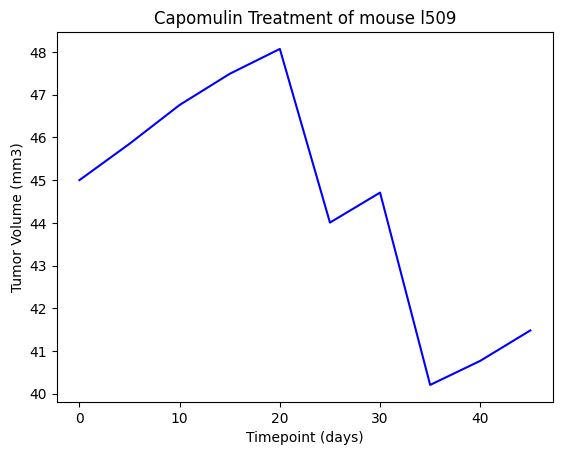

In [207]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume = clean_data[(clean_data['Mouse ID'] == "l509") & (clean_data['Drug Regimen'] == "Capomulin")]['Tumor Volume (mm3)']
time_point = clean_data[(clean_data['Mouse ID'] == "l509") & (clean_data['Drug Regimen'] == "Capomulin")]['Timepoint']
mouse_l509 = plt.plot(time_point, tumor_volume, color="blue")
plt.title('Capomulin Treatment of mouse l509')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

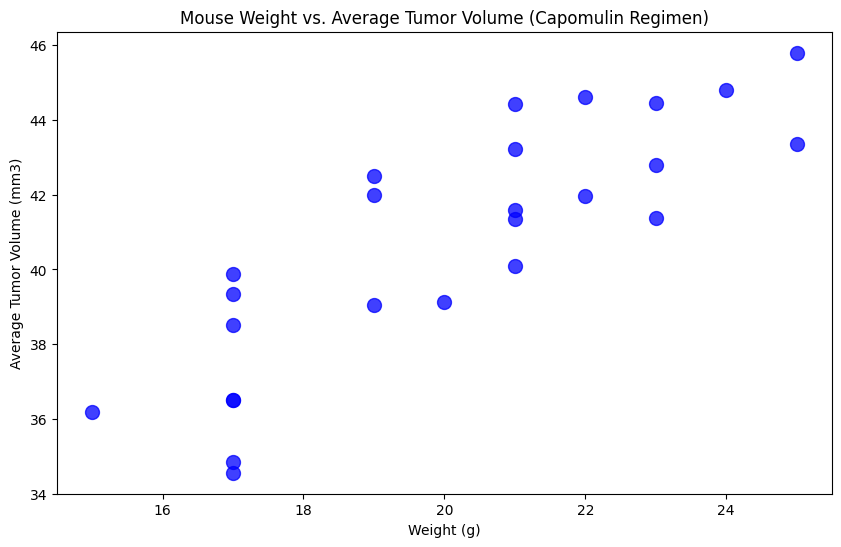

In [208]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_data[clean_data['Drug Regimen'] == "Capomulin"]
group_mouse = capomulin_regimen.groupby(['Mouse ID'])
# Calculate average tumor volume for each mouse
avg_tumor_data = group_mouse['Tumor Volume (mm3)'].mean()
avg_tumor_data = avg_tumor_data.reset_index()
# Merge average tumor volume with weight data
merged_capomulin = pd.merge(avg_tumor_data, capomulin_regimen[['Mouse ID', 'Weight (g)']].drop_duplicates(), on= 'Mouse ID')

# Create scatter plot of weight vs. average tumor volume
weight_values = merged_capomulin['Weight (g)']
avg_tumor = merged_capomulin['Tumor Volume (mm3)']
plt.figure(figsize=(10, 6))
plt.scatter(weight_values, avg_tumor, marker='o', facecolors='blue', s=100, alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


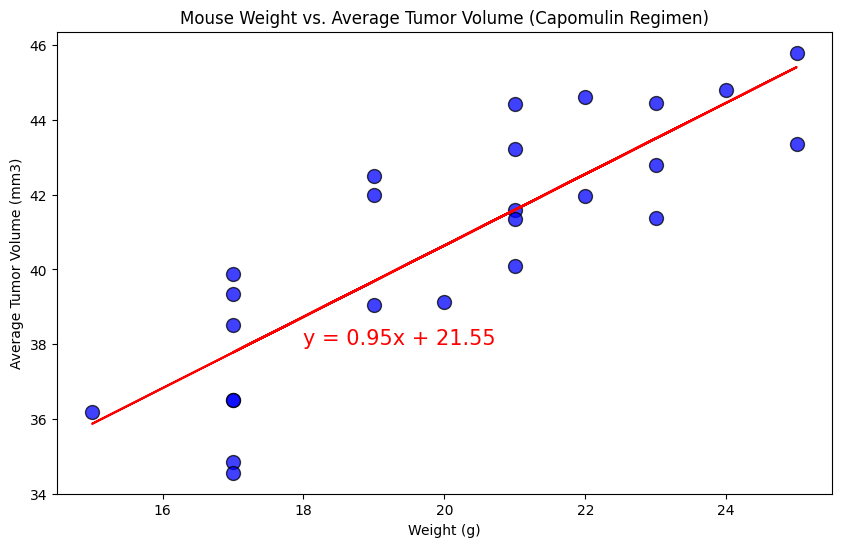

In [209]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_values = merged_capomulin['Weight (g)']
avg_tumor = merged_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_values, avg_tumor)
regress_values = weight_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(weight_values, avg_tumor, marker='o', facecolors='blue', edgecolors='black', s=100, alpha=0.75)
plt.plot(weight_values,regress_values,"r-")
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}')
plt.show()
